## Learning Objectives

Today we are going to apply confidence intervals to real world data, being very careful to state our assumptions along the way.

## What's next

So you have gone to your team and shown them your estimate of the median ages of billionaires. They are pretty happy with the results, but they want to know some more information. They are interested when these billionaires founded their companies and they want to know what is the 25 percentile oldest companies that billionaire currently have founded.

So they are not just interested in the statistic on the dataset, they are interested as well in what the true population looks like. So that means we need to do bootstrapping.

First step get the data:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')

del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

The second step will be to isolate our original sample:

In [2]:
df2014 = df[df.year == 2014]

founded_sample = df2014.founded.dropna()

founded_sample.describe()

count    1641.000000
mean     1963.185253
std        38.071352
min      1615.000000
25%      1948.000000
50%      1973.000000
75%      1991.000000
max      2012.000000
Name: founded, dtype: float64

Then we will draw bootstrap samples from our original sample:

In [3]:
bootstrap_samples = np.random.choice(founded_sample, size=(founded_sample.count(), 9999))

In [4]:
print(bootstrap_samples)

[[1871. 1953. 1995. ... 1989. 1954. 1965.]
 [1983. 1997. 1973. ... 1968. 1926. 1997.]
 [1994. 1994. 1994. ... 1985. 1961. 1995.]
 ...
 [1988. 1991. 1989. ... 1977. 1946. 2007.]
 [1993. 2005. 1962. ... 1995. 1992. 2004.]
 [1991. 1974. 1954. ... 1998. 1962. 1992.]]


Now we will compute the estimate of interest from each of the samples:

In [6]:
bootstrap_estimates = np.percentile(bootstrap_samples, 25, axis=0)

bootstrap_estimates.shape

(9999,)

In [9]:
print(bootstrap_estimates)

[1948. 1949. 1947. ... 1946. 1950. 1949.]


Now we plot the distribution:

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


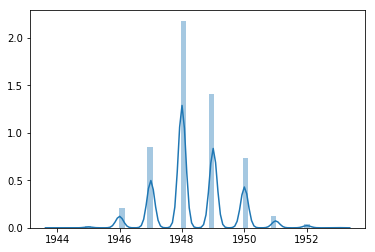

In [5]:
%matplotlib inline
import seaborn as sns

sns.distplot(bootstrap_estimates)

You then go back to your team and show them this distribution. And there are blank stares. They don't know what to draw from it? They just wanted a plausible range for this estimate, and this is where confidence intervals come in. 


## Confidence Intervals

Making the confidence interval is pretty easy, we just remove the most extreme values to the left and the right of the distribution. So if we wanted a 95% confidence interval, then we would remove 2.5% of the values on the right and 2.5% of the values on the left. Let's do that below:

In [6]:
print(np.percentile(bootstrap_estimates, 2.5))
print(np.percentile(bootstrap_estimates, 97.5))

1946.0
1951.0


And this would be our confidence interval. In terms of visualizations, seaborn is quite nice because it will visualize this confidence interval for you if you use certain plots:

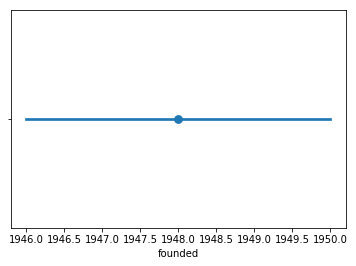

In [7]:
sns.pointplot(founded_sample, ci=95, estimator=lambda x: np.percentile(x, 25))

And if you are lazy you can just use seaborn's bootstrap confidence interval function:

In [8]:
sns_bs = sns.algorithms.bootstrap(founded_sample, func=lambda x: np.percentile(x, 25))

sns_bs.shape

(10000,)

In [9]:
print(np.percentile(sns_bs, 2.5))
print(np.percentile(sns_bs, 97.5))

1946.0
1951.0


## A warning

There is one thing that needs to be said before we end our lesson here, and that is to mention black swans. We know from our previous analysis that worth in billions has a long right tail, and is a power law distribution. A single person can shift the average. For example it would not be impossible that one person had 500 billion dollars, and if they were included in the young populaiton, then the mean would shift by 1 billion dollars. Crazy right. Because this type of event is possible we need to be sure to alert people that use this data that an event like this may happen. This type of event on the other hand could not have happened with age (nobody can be 500 years old).

## Learning Objectives

Today we are going to apply confidence intervals to real world data, being very careful to state our assumptions along the way.

## Comprehension Questions

1.	What is the true population of billionaires? Did we get IID samples from it?
    - It's every human who owns or is worth some billion or billions in currency at all points in time
        - Depends on the problem statemet, what are we looking for?
    - Maybe, need to read through documentation to confirm the methodology to confirm that it truly is random
    
2.	How would you explain a confidence interval to a non-technical person?
    - With a certain amount of confidence, I know what I saw is likely to happen with a certain % confidence
    - In a controlled experiment; the delta of in the test group might be a fluke. This allows me to see if that fluke (with some confidence) is an observation that is likely tied to your hypothesis

3.	Can we compute certain statistics from the data better than others?
    - Better confidence intervals for specific statistics (function, mean versus maxes, outlier independent ones)
    
4.	Is a 50% confidence interval narrower or wider than a 99% confidence interval?
    - narrower


In [11]:
df.head()

,age,category,citizenship,company.name,company.type,country code,founded,gdp,gender,industry,name,rank,region,relationship,sector,was political,wealth.type,worth in billions,year
0,NaN,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968.0,1.580000e+11,male,Money Management,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,False,self-made finance,1.0,1996
1,34.0,Financial,United States,Fidelity Investments,new,USA,1946.0,8.100000e+12,female,Money Management,Abigail Johnson,145,North America,relation,investment banking,False,inherited,2.5,1996
2,59.0,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948.0,8.540000e+11,male,"Retail, Restaurant",Abilio dos Santos Diniz,322,Latin America,relation,retail,False,inherited,1.2,1996
3,61.0,New Sectors,Germany,Ratiopharm,new,DEU,1881.0,2.500000e+12,male,Technology-Medical,Adolf Merckle,388,Europe,relation,pharmaceuticals,False,inherited,1.0,1996
4,NaN,Financial,Hong Kong,Swire,new,HKG,1816.0,1.600000e+11,male,Money Management,Adrian and John Swire,162,East Asia,relation,trading company,False,inherited,2.2,1996
